<h1> KNN </h1>
<p> KNN is a basic non parametric classification model which uses a distance metric to cluster similar points together. The points are then ranked depending on the most likely class, ie whichever class maximizes the likelihood function which is a simple probability. We begin our analysis with loading the breast cancer dataset</p>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

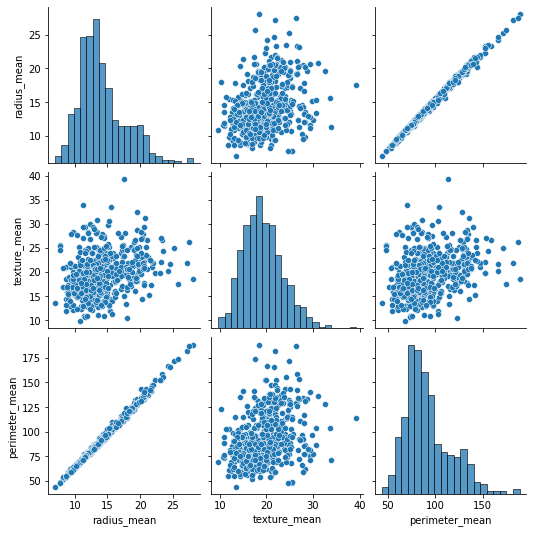

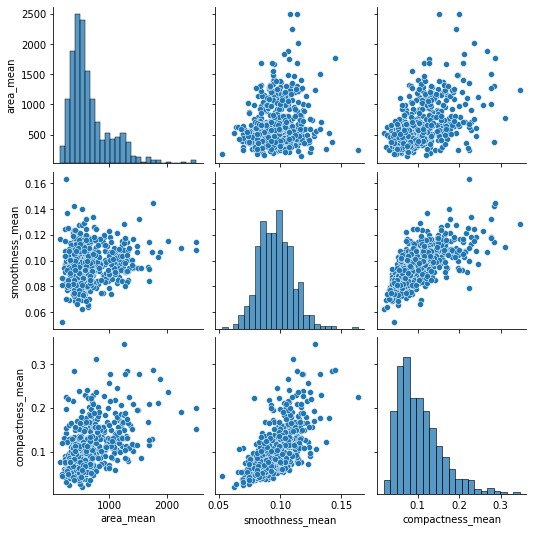

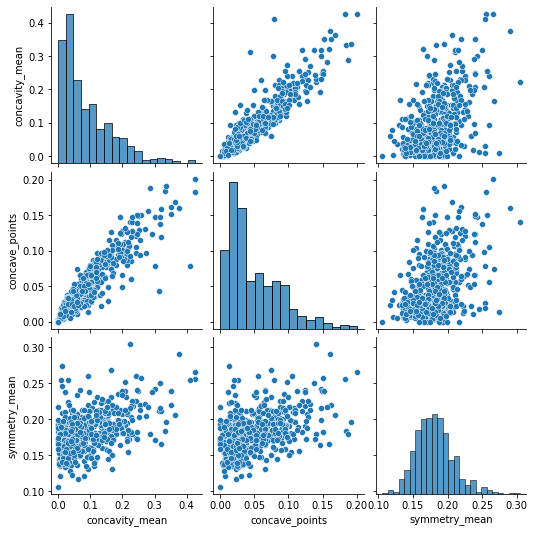

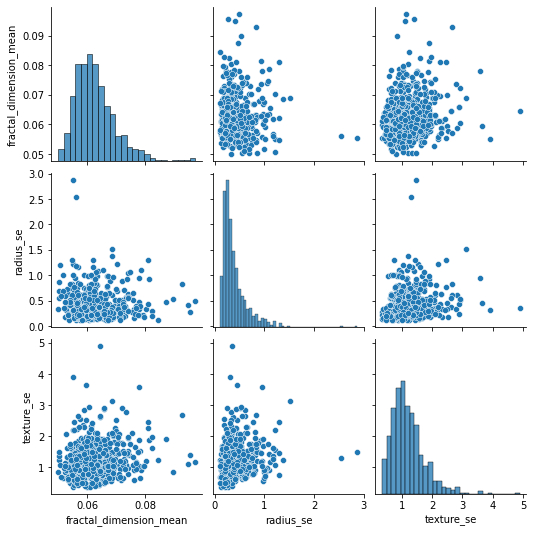

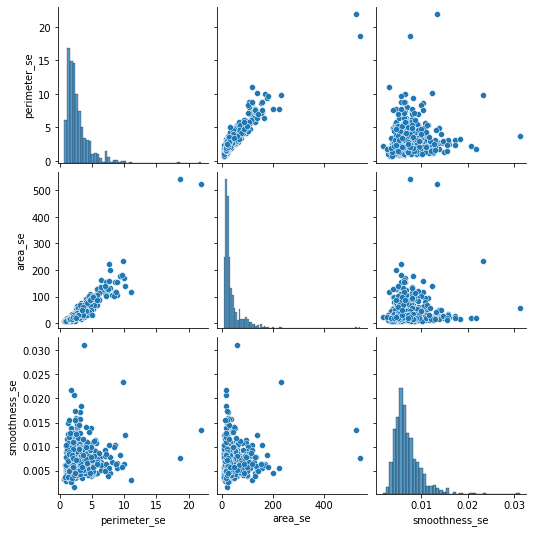

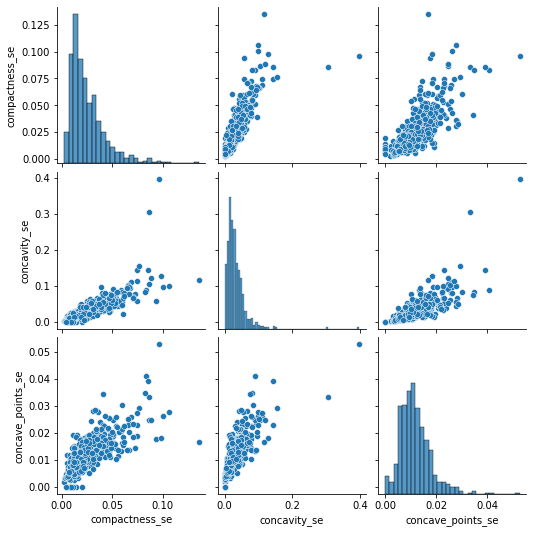

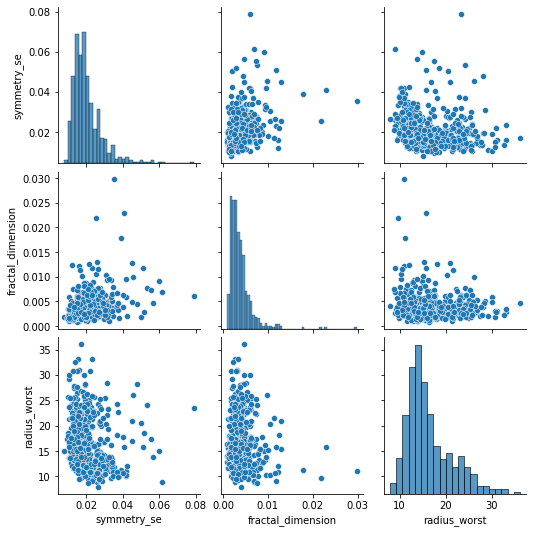

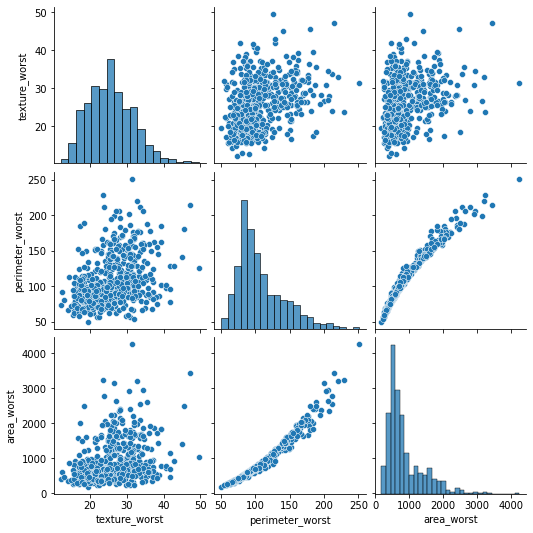

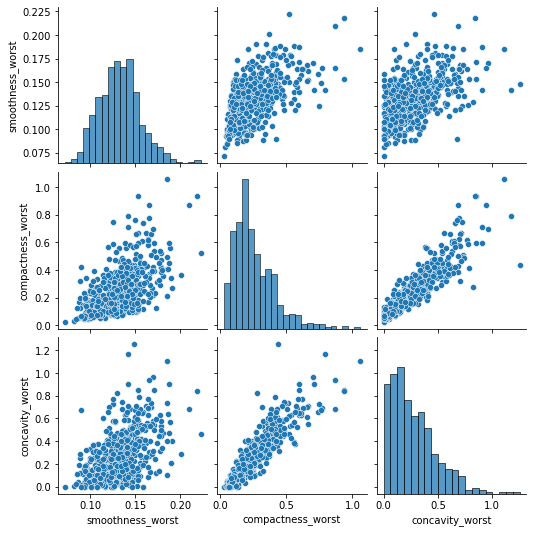

In [2]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 99)

#plt.scatter(X_train, Y_train)

#create a dataframe
df = pd.DataFrame({
    "radius_mean":[], "texture_mean":[], "perimeter_mean":[], "area_mean":[], "smoothness_mean":[], "compactness_mean":[],
    "concavity_mean":[], "concave_points":[], "symmetry_mean":[], "fractal_dimension_mean":[], "radius_se":[], "texture_se":[],
    "perimeter_se":[], "area_se":[], "smoothness_se":[], "compactness_se":[], "concavity_se":[], "concave_points_se":[],
    "symmetry_se":[], "fractal_dimension":[], "radius_worst":[], "texture_worst":[], "perimeter_worst":[], "area_worst":[],
    "smoothness_worst":[], "compactness_worst":[], "concavity_worst":[], "concave_points_worst":[], "symmetry_worst":[],
    "fractal_dimension_worst":[]
});

for cindex in range(len(df.columns)):
    df[df.columns[cindex]] = cancer.data[:, cindex]
    #sns.histplot(data=df, x=df.columns[cindex])

l = np.arange(0,30,3)
for index in range(len(l)-1):
    sns.pairplot(df[df.columns[l[index]:l[index+1]]])


In [3]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=3).fit_transform(df, cancer.target)

fscore, p = chi2(df, cancer.target)
p_series = pd.Series(p)
p_series.index = df.columns
p_series = p_series.sort_values(ascending = True)

top_series = p_series[0:14]
df_splice_best = df[top_series.index]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df_splice_best, cancer.target, test_size=0.2, random_state = 99)
model = KNeighborsClassifier(n_neighbors=3)

num_neighbors = len(df_splice_best.columns)
for N in range(num_neighbors):
    model = KNeighborsClassifier(n_neighbors=N+1)
    model.fit(X_train, Y_train)
    print("Perdicted accurracy for {1} neighbors: {0}".format(model.score(X_test, Y_test), N+1))



Perdicted accurracy for 1 neighbors: 0.9298245614035088
Perdicted accurracy for 2 neighbors: 0.9122807017543859
Perdicted accurracy for 3 neighbors: 0.9385964912280702
Perdicted accurracy for 4 neighbors: 0.9298245614035088
Perdicted accurracy for 5 neighbors: 0.9385964912280702
Perdicted accurracy for 6 neighbors: 0.9385964912280702
Perdicted accurracy for 7 neighbors: 0.956140350877193
Perdicted accurracy for 8 neighbors: 0.956140350877193
Perdicted accurracy for 9 neighbors: 0.956140350877193
Perdicted accurracy for 10 neighbors: 0.956140350877193
Perdicted accurracy for 11 neighbors: 0.9473684210526315
Perdicted accurracy for 12 neighbors: 0.9473684210526315
Perdicted accurracy for 13 neighbors: 0.9473684210526315
Perdicted accurracy for 14 neighbors: 0.9473684210526315


<h1> Validation Pipeline. </h1>
<p> using gridsearchCV to determine the best number of neighbours, the distance metric to use, and leaf_size. Note the leaf size parameter reduces the amount of neighbours which can be used in making the decision. THis reduces decision and training time as it only considers a subset</p>



In [7]:
n_neighbours = list(range(1,10))
leaf_size = list(range(1,50))
p = [1,2]

grids = dict(n_neighbors = n_neighbours, leaf_size = leaf_size, p=p)
print("Grids made!")


Grids made!


In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#defined a general knn model
print("RUnning classification")
knn = KNeighborsClassifier()

#now defined the gridsearch
clf = GridSearchCV(knn, grids, cv=2)

print("DONE!")
model = clf.fit(X_train, Y_train)
print(model.score(X_test, Y_test))



RUnning classification
DONE!
0.956140350877193


In [16]:
print("After gridsearchcv")
print("Neighbors: {}".format(model.best_estimator_.get_params()))

After gridsearchcv
Neighbors: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [11]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<h1> Results </h1>
<p> From the the above, we can see that the manhattan distance metric, 6 neighbours, and 1 leaf produces the best results using grid search crossvalidation </p>

In [ ]:
##now with pipelining through